In [ ]:
!pip install -U albumentations

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.5/123.5 kB 2.3 MB/s eta 0:00:00
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.2.1
    Uninstalling albumentations-1.2.1:
      Successfully uninstalled albumentations-1.2.1


In [ ]:
from google.colab import drive
import cv2
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Activity_Recognition/training

/content/drive/My Drive/Activity_Recognition/training


In [ ]:
#필요 라이브러리 가져오기
import albumentations as A
import cv2
import os
import pandas as pd

In [ ]:
files = pd.read_csv('training_labels_5.csv', index_col = 0)

In [ ]:
#증강 필요한 디렉토리에서 이미지 값 가져오기
files = pd.read_csv('training_labels_6.csv', index_col = 0)
con1000 = files['label'].value_counts(dropna = False).loc[files['label'].value_counts(dropna = False)<1000].index
label1000under =files['label'].value_counts(dropna = False).loc[files['label'].value_counts(dropna = False)<1000]
#증강할 레이블 데이터프레임으로 가져오기
print(len(list(label1000under))) #1000개 미만 레이블 개수
print(con1000) #1000개 미만 레이블 번호

93
Int64Index([ 64, 380, 384, 369, 366, 546,  63, 657, 360, 543, 644,  66, 363,
            623, 392, 240, 540,  79,  72, 234, 654, 394, 379, 237, 650,  77,
             71,  84,  83, 357, 631,  67,  82, 649, 636,  70,  75, 233, 664,
             74, 653, 622, 400, 231,  68, 375,  81, 630, 666, 389, 632, 642,
            626, 229, 372, 647, 370, 663, 659, 648, 658, 640, 665, 399, 625,
            635, 645, 643, 243, 641, 628, 660, 651,  65, 624, 376, 362, 634,
            241, 639, 661, 662, 646, 242, 381, 633, 637, 629, 656, 638, 627,
            232, 386],
           dtype='int64')


In [ ]:
#증강 파이프라인 정의
transform = A.Compose([
    A.RandomSizedBBoxSafeCrop(2100, 2800, erosion_rate=0.0, interpolation=1, always_apply=False, p=1.0)
], bbox_params=A.BboxParams(format='pascal_voc'))

#파라미터 중 가시성 파라미터는 필요없음 -> bbox 건들지 않는 증강 방법이기 때문

In [ ]:
from tqdm import tqdm
ns = con1000 #레이블 번호
ns = ns[30:55]
nl = label1000under #레이블 개수
for n in ns:
  tr_files = files[files['label']==n]
  aug_num=1000-len(tr_files)
  count = 0
  name = []
  xmin = []
  ymin = []
  xmax = []
  ymax = []
  label = []
  print(n,"번 레이블 진행중...")
  #이미지 읽어오기
  with tqdm(total = aug_num) as pbar:
    while count < aug_num:
      for index, f in tr_files.iterrows():
        if count > aug_num:
          break
        else:
          path =  os.path.join("images/",f['image'])
          if os.path.isfile(path):
            try:
              image = cv2.imread(path)
              image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
              bboxes = [[f['xmin'],f['ymin'],f['xmax'],f['xmin'],str(f['label'])]]
                  # 이미지 증강
              transformed = transform(image=image, bboxes=bboxes)

                  #증강한 이미지와 bbox 받기
              transformed_image = transformed["image"]
              transformed_bboxes = transformed['bboxes']

                  #이미지 저장
              transformed_image = cv2.cvtColor(transformed_image, cv2.COLOR_RGB2BGR)
              ff= f['image'].replace(".jpg", "_")
              filename = "images/"+ff+'transformed'+str(count)+'.jpg'
              filename1 = ff+'transformed'+str(count)+'.jpg'
              cv2.imwrite(filename, transformed_image)

                  #csv 파일로 데이터 정보 담기(label)
              name.append(filename1)
              xmin.append(transformed_bboxes[0][0])
              ymin.append(transformed_bboxes[0][1])
              xmax.append(transformed_bboxes[0][2])
              ymax.append(transformed_bboxes[0][3])
              label.append(transformed_bboxes[0][4])
              count += 1
              pbar.update(1)
            except:
                pass
  data = {'image':name, 'xmin':xmin, 'ymin': ymin, 'xmax':xmax, 'ymax':ymax, 'label':label}
  df = pd.DataFrame(data)
  fn = "transformed_bbox"+str(n)+".csv"
  df.to_csv(fn)

631 번 레이블 진행중...


256it [11:43,  2.75s/it]


67 번 레이블 진행중...


259it [13:13,  3.06s/it]


82 번 레이블 진행중...


264it [12:39,  2.88s/it]


649 번 레이블 진행중...


269it [09:49,  2.19s/it]


636 번 레이블 진행중...


272it [08:34,  1.89s/it]


70 번 레이블 진행중...


279it [08:48,  1.89s/it]


75 번 레이블 진행중...


304it [10:06,  2.00s/it]


233 번 레이블 진행중...


318it [12:58,  2.45s/it]


664 번 레이블 진행중...


321it [11:15,  2.11s/it]


74 번 레이블 진행중...


332it [10:06,  1.83s/it]


653 번 레이블 진행중...


339it [09:01,  1.60s/it]


622 번 레이블 진행중...


357it [11:08,  1.87s/it]


400 번 레이블 진행중...


359it [15:59,  2.67s/it]


231 번 레이블 진행중...


386it [13:20,  2.07s/it]


68 번 레이블 진행중...


396it [14:00,  2.12s/it]


375 번 레이블 진행중...


396it [13:59,  2.12s/it]


81 번 레이블 진행중...


430it [14:14,  1.99s/it]


630 번 레이블 진행중...


437it [13:00,  1.79s/it]


666 번 레이블 진행중...


443it [10:14,  1.39s/it]


389 번 레이블 진행중...


447it [15:43,  2.11s/it]


632 번 레이블 진행중...


461it [11:28,  1.49s/it]


642 번 레이블 진행중...


501it [10:48,  1.29s/it]


626 번 레이블 진행중...


530it [11:42,  1.33s/it]


229 번 레이블 진행중...


531it [14:25,  1.63s/it]


372 번 레이블 진행중...


540it [14:18,  1.59s/it]


In [ ]:
df

,image,xmin,ymin,xmax,ymax,label
0,TS_캠핑용품/1950630_616_transformed.jpg,1198.353909,1063.932449,2707.818930,1925.211098,490
1,TS_캠핑용품/2005664_616_transformed.jpg,1309.606299,1573.398414,1953.385827,1733.557047,490
2,TS_캠핑용품/2154245_616_transformed.jpg,473.155080,896.852046,934.331551,1663.693599,490
3,TS_캠핑용품/2001720_616_transformed.jpg,1516.086235,345.086705,1843.449420,773.410405,490
4,TS_캠핑용품/2011897_616_transformed.jpg,201.746725,1013.357401,626.637555,1459.386282,490
...,...,...,...,...,...,...
811,TS_캠핑용품/2154138_616_transformed.jpg,1026.666667,68.217735,2548.000000,684.021071,490
812,TS_캠핑용품/2005759_616_transformed.jpg,1481.355932,1239.084507,1945.762712,1342.605634,490
813,TS_캠핑용품/2004604_616_transformed.jpg,1323.606168,707.658643,1537.841044,1668.052516,490
814,TS_캠핑용품/1983154_616_transformed.jpg,861.068702,1055.491632,1221.374046,1423.430962,490


## yolo 형식으로 바꿔서 저장하기


In [ ]:
def extract_info_dict(line):
  info_dict = {}
  info_dict['bboxes']=[]
  bbox = dict(category = line['label'] , xmin = line['xmin'], ymin = line['ymin'], xmax=line['xmax'], ymax =line['ymax'])
  info_dict['bboxes'].append(bbox)
  info_dict['filename']=line['image']
  info_dict['image_size']=(2800,2100)
  return info_dict

In [ ]:
def convert_to_yolov5(info_dict):
  print_buffer = []
  for b in info_dict['bboxes']:
    try:
      class_id = b['category']
    except Exception as e:
      print(e)

    b_center_x = (b["xmin"] + b["xmax"])/2
    b_center_y = (b['ymin']+ b['ymax']) /2
    b_width    = (b["xmax"]-b["xmin"])
    b_height   = (b["ymax"]-b["ymin"])


    image_w, image_h = info_dict['image_size']
    b_center_x /= image_w
    b_center_y /= image_h
    b_width    /= image_w
    b_height   /= image_h

    print_buffer.append("{} {:.3f} {:.3f} {:3f} {:.3f}".format(class_id, b_center_x, b_center_y, b_width, b_height) )

  save_file_name = os.path.join("TS_annotation_yolo", info_dict['filename'].replace("jpg", "txt"))

  print("\n".join(print_buffer), file = open(save_file_name, "w"))

# 예시 확인

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw

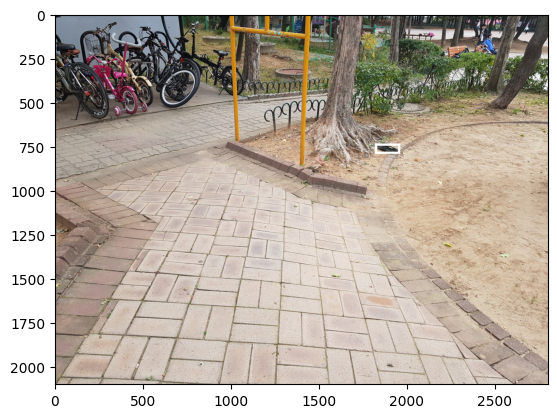

In [ ]:
images = Image.open('training/images/TS_헬스_요가/1967166_605.jpg')
plotted_image = ImageDraw.Draw(images)
bboxes = [1817.901541630657, 735.7816247658332,1817.901541630657+142.84381499186088, 735.7816247658332+57.94434891628953]
plotted_image.rectangle(((bboxes[0],bboxes[1]), (bboxes[2],bboxes[3])), width = 13)
plt.imshow(images)
plt.show()

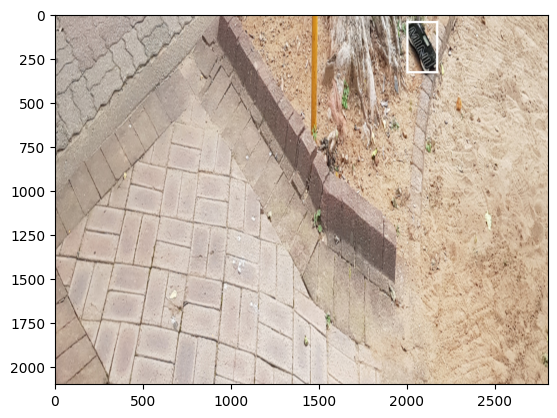

In [ ]:
images = Image.open('transformed_image.jpg')
plotted_image = ImageDraw.Draw(images)
plotted_image.rectangle(((transformed_bboxes[0][0],transformed_bboxes[0][1]), (transformed_bboxes[0][2],transformed_bboxes[0][3])), width = 1)
plt.imshow(images)
plt.show()